# Simulator Developer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import buskit as bk
from buskit import busdata as bdata
from buskit import dashboard as bdash
from buskit import simulator as bsim

from IPython.display import display, clear_output

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# specify path to the archive AVL file
# archive_path = 'MTA_data/B46%2B-180716-171100-44650-Mon.csv'
# archive_path = 'MTA_data/B15-180705-145946-44650-Thu.csv'
archive_path = 'MTA_data/B15-180625-235941-44650-Mon.csv'

# specify direction and time
direction = 1
time = 180 # minutes

# Original trajectory

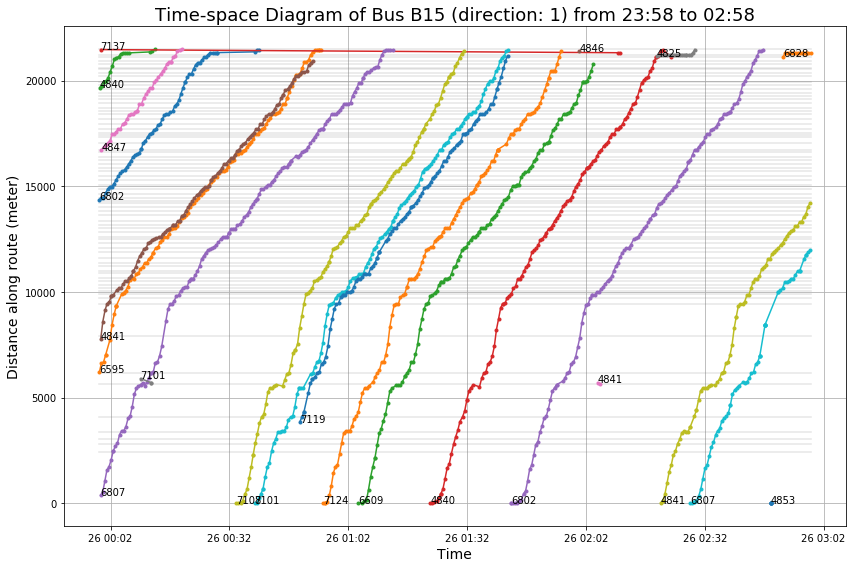

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11d54fb00>)

In [3]:
# plot TSD for cross-validation
df = pd.read_csv(archive_path)
df = bdata.split_trips(df)
bdata.plot_tsd(df, direction, 0, time)

# Simulation without control

arr 52 1 2018-06-25 23:59:01-04:00
arr 13 1 2018-06-25 23:59:39-04:00
dep 13 0 2018-06-25 23:59:40-04:00
arr 69 1 2018-06-25 23:59:26-04:00
arr 5 1 2018-06-25 23:59:40-04:00
arr 41 1 2018-06-25 23:59:21-04:00
dep 52 0 2018-06-25 23:59:24-04:00
dep 41 0 2018-06-25 23:59:47-04:00
dep 69 0 2018-06-25 23:59:53-04:00
dep 5 0 2018-06-26 00:00:10-04:00
arr 53 1 2018-06-25 23:59:44-04:00
arr 70 1 2018-06-26 00:00:15-04:00
arr 42 1 2018-06-26 00:00:10-04:00
dep 53 0 2018-06-26 00:00:08-04:00
dep 70 0 2018-06-26 00:00:43-04:00
dep 42 0 2018-06-26 00:00:49-04:00
arr 54 1 2018-06-26 00:00:51-04:00
arr 14 1 2018-06-26 00:01:25-04:00
arr 13 1 2018-06-26 00:01:06-04:00
dep 13 0 2018-06-26 00:01:07-04:00
arr 71 1 2018-06-26 00:01:18-04:00
dep 54 0 2018-06-26 00:01:02-04:00
dep 71 0 2018-06-26 00:01:24-04:00
dep 14 0 2018-06-26 00:01:44-04:00
arr 43 1 2018-06-26 00:01:24-04:00
arr 72 1 2018-06-26 00:01:42-04:00
arr 15 1 2018-06-26 00:02:13-04:00
arr 55 1 2018-06-26 00:01:44-04:00
dep 43 0 2018-06-26 00

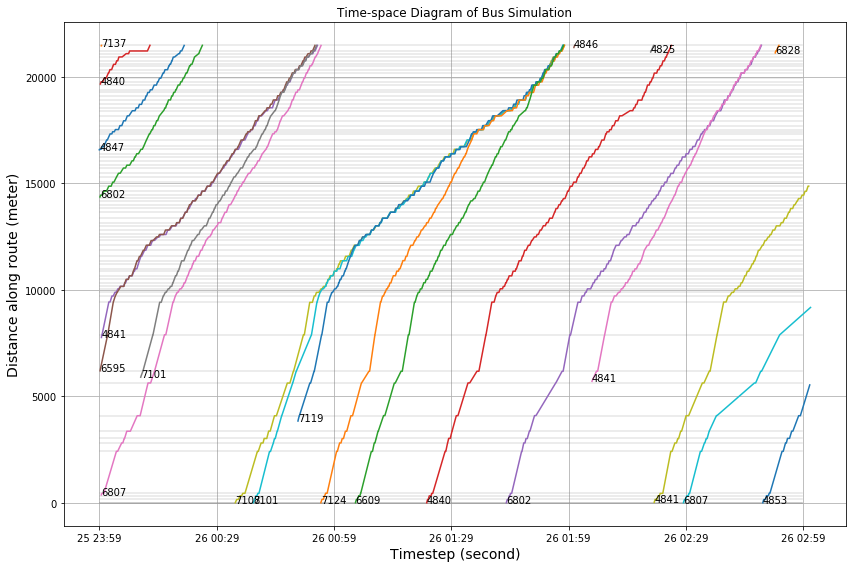

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x105df5ac8>)

In [3]:
# reset stops, links, and buses
stops1, links1, stop_pos = bsim.set_route(archive_path, direction)
infer_bus = {} # Bus objs for infer buffering only
live_bus = {} # Bus objs for streaming live
active_bus1 = {} # SimBus objs for simulation

# infer half an hour for initial data
bsim.infer(archive_path, direction, infer_bus, stops1, links1, stop_pos, 30)

# run simulation without control
report1 = bsim.simulate(archive_path, direction, live_bus, active_bus1, stops1, links1, stop_pos, False, sim_time=time)

# plot result tsd
bsim.sim_tsd(active_bus1, stops1, archive_path, direction, 0, time)

# Simulation with control
### Hold bus within 10 minute headway for 1 minute at each stop until relieved

arr 52 1 2018-06-25 23:59:01-04:00
arr 13 1 2018-06-25 23:59:39-04:00
arr 69 1 2018-06-25 23:59:26-04:00
arr 5 1 2018-06-25 23:59:40-04:00
arr 41 1 2018-06-25 23:59:21-04:00
dep 13 0 2018-06-25 23:59:44-04:00
dep 69 0 2018-06-25 23:59:47-04:00
dep 5 0 2018-06-26 00:00:02-04:00
dep 52 0 2018-06-25 23:59:33-04:00
arr 70 1 2018-06-26 00:00:09-04:00
arr 53 1 2018-06-25 23:59:53-04:00
dep 41 0 2018-06-26 00:00:04-04:00
dep 53 0 2018-06-26 00:00:02-04:00
arr 42 1 2018-06-26 00:00:27-04:00
dep 70 0 2018-06-26 00:00:45-04:00
arr 54 1 2018-06-26 00:00:45-04:00
dep 42 0 2018-06-26 00:01:02-04:00
arr 13 1 2018-06-26 00:01:06-04:00
arr 14 1 2018-06-26 00:01:29-04:00
arr 71 1 2018-06-26 00:01:20-04:00
dep 14 0 2018-06-26 00:01:46-04:00
dep 54 0 2018-06-26 00:01:21-04:00
dep 71 0 2018-06-26 00:01:42-04:00
arr 43 1 2018-06-26 00:01:37-04:00
arr 15 1 2018-06-26 00:02:15-04:00
arr 72 1 2018-06-26 00:02:00-04:00
dep 15 0 2018-06-26 00:02:31-04:00
arr 55 1 2018-06-26 00:02:03-04:00
dep 55 0 2018-06-26 00

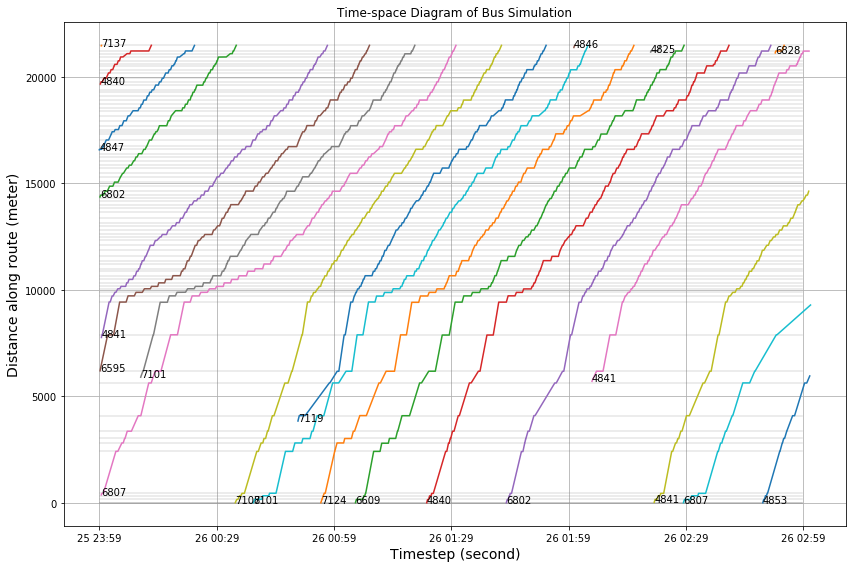

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x115410978>)

In [9]:
# reset stops, links, and buses
stops2, links2, stop_pos = bsim.set_route(archive_path, direction)
infer_bus = {} # Bus objs for infer buffering only
live_bus = {} # Bus objs for streaming live
active_bus2 = {} # SimBus objs for simulation

# infer half an hour for initial data
bsim.infer(archive_path, direction, infer_bus, stops2, links2, stop_pos, 30)

# run simulation with control
report2 = bsim.simulate(archive_path, direction, live_bus, active_bus2, stops2, links2, stop_pos, True, sim_time=time)

# plot result tsd
bsim.sim_tsd(active_bus2, stops2, archive_path, direction, 0, time)

In [17]:
def eval_hold(bus_dict):
    all_log = [bus.log_hold for bus in bus_dict.values()]
    all_hold = [hold for log in all_log for hold in log if hold != None]
    total_hold = sum(all_hold)
    return total_hold

def eval_headway(stop_dict):
    all_log = [stop.sim_headway for stop in stop_dict.values()]
    all_hw = [hw for log in all_log for hw in log if hw != None]
    total_hw = sum(all_hw)
    mean_hw = np.mean(all_hw)
    std_hw = np.std(all_hw)

#     wait_time = 0.5 * hw
#     print(mean_hw / 60, std_hw / 60) # minute
    return mean_hw/60, std_hw/60

In [15]:
# bunch metrics
report1, report2

({'bunch': 13027}, {'bunch': 78})

In [20]:
# hold metrics
eval_hold(active_bus1), eval_hold(active_bus2)

(0, 14940)

In [18]:
# headway metrics
eval_headway(stops1), eval_headway(stops2)

((16.574501424501424, 14.11383381757032),
 (12.594042476601873, 5.8401834376728905))

In [ ]:
- Holding Strategies； in dense run setting
flowchart: eval scheme, infer before sim

def eval_sim(bus_dict1, bus_dict2, duration):
    """
    evaluates how well the simulation is doing
    # not in use # bus_dict1: live_bus information from streaming
    bus_dict2: active_bus information from simulation
    """
    buses1 = set(bus_dict1.keys())
    buses2 = set(bus_dict2.keys())
    >>> intersect = 
    sim_mse = [] # mse from all runs
    for ref in intersect:
        >>> align by time
        >>> based on live_bus location (30-sec interval)
        bus_dict1[ref].pos
        bus_dict2[ref].pos
        
        err = [array of difference btwn pos lists]
        mse = np.mean(err^2)
        sim_mse.append(mse)
    result = np.mean(sim_mse) / duration
    return result # mse per run per time unit
    
def eval_strategy(sim, control):
    """
    evaluates how well the holding strategy is doing
    sim: a dicionary of bus objects in direct simulation
    control: same collection of buses but run under control scheme
    """
    sim_buses = sim.values()
    
    hold = eval_hold(bus_dict)
    

- Remove/solve incomplete vehicle pings?
- eliminate convergence; different dwelling time settings
experiment setting: scope, time
def of BB: time (determine hold), space (evaluating)

by OD (as a function?):
    in-vehicle traveling time
    delay time：by vehicle, by stop, by pax, distribution of hold times across the route

In [31]:
# # parse stops and set links
# stops, links, stop_pos = bsim.set_route(archive_path, 1)

# # create empty dictionary storage for bus objects
# live_bus = {} # for buses from archive streaming
# active_bus = {} # for buses in the simulator

###

# bsim.infer(archive_path, 1, live_bus, stops, links, stop_pos, 360)

# speeds = [np.mean(l.log_speed) for l in links.values() if np.mean(l.log_speed) != nan]
# speeds = np.array(speeds)[~np.isnan(speeds)]

# mean([mean(l.log_speed) for l in links.values() if len(l.log_speed) > 0])

# speeds = [l.log_speed for l in links.values() if np.mean(l.log_speed) != nan]
# flat_list = [item for sublist in speeds for item in sublist if item < 25]

# plt.hist(flat_list, bins=100)

###

# d = [s.log_dwell_t for s in stops.values()]
# w = [s.log_wait_t for s in stops.values()]

# d_flat = [item for sublist in d for item in sublist]
# w_flat = [item for sublist in w for item in sublist]

# qs = [s.log_q for s in stops.values()]
# qs = [item for sublist in qs for item in sublist if item < 1]
# plt.hist(qs)

/Users/Yuwen/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Yuwen/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
